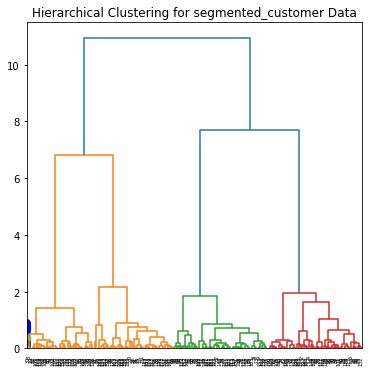

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

raw_df = pd.read_csv('segmented_customers.csv')
raw_df = raw_df.drop('CustomerID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 

# scale data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalize data 
normalized_df = normalize(scaled_df) 
  
# Convert from numpy array to pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reduce the dimensions of the data to 2 for better visualization 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# dendogram visualization
plt.figure(figsize =(6, 6)) 
plt.title('Hierarchical Clustering for segmented_customer Data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 



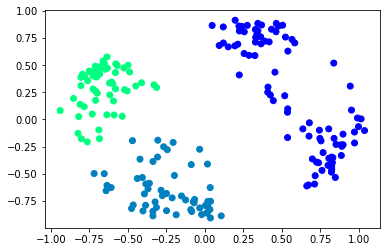

In [6]:
# Visualize the clustering using k = 3
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()